# Outline
1. Linear Regression
1. Polynomical Regression
1. Sigmoid

# Understanding the Data
- **TARGET COUNTRY** Japan
- **DATE RANGE** HOGEHOGE - March 31st, 2020
- **COLIMNS** ID, AccumulatedCases, Fatalities
- **VALUE RANGE（AccumulatedCases）** 2 - 1953
- **VALUE RANGE（Fatalities）** 0 - 56

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [55]:
df = pd.read_csv("train.csv")
df

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
20575,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0
20576,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0
20577,29368,NaN,Zimbabwe,2020-03-29,7.0,1.0
20578,29369,NaN,Zimbabwe,2020-03-30,7.0,1.0


Since Id is allocated to each data by day, I will use this data instead of editing Date data. Between January 22nd and March 31st, there were 70 days.

In [56]:
df = df.drop(['Province_State', 'Date'], axis = 1)
df = df.query('Country_Region == "Japan"')
df = df.rename(columns={'ConfirmedCases':'AccumulatedCases'})
df.Id = df.Id - 14200
df.tail(70)

,Id,Country_Region,AccumulatedCases,Fatalities
9940,1,Japan,2.0,0.0
9941,2,Japan,2.0,0.0
9942,3,Japan,2.0,0.0
9943,4,Japan,2.0,0.0
9944,5,Japan,4.0,0.0
...,...,...,...,...
10005,66,Japan,1468.0,49.0
10006,67,Japan,1693.0,52.0
10007,68,Japan,1866.0,54.0
10008,69,Japan,1866.0,54.0


# Simple Regression

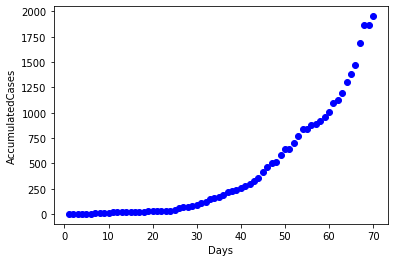

In [57]:
plt.scatter(df.Id, df.AccumulatedCases,  color='blue')
plt.xlabel("Days")
plt.ylabel("AccumulatedCases")

plt.show()

### Train data distribution

In [58]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

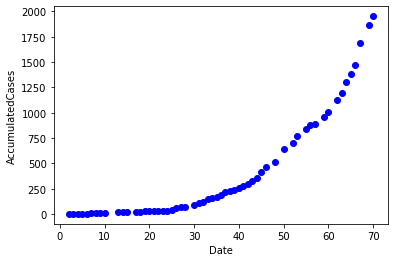

In [59]:
plt.scatter(train.Id, train.AccumulatedCases,  color='blue')
plt.xlabel("Date")
plt.ylabel("AccumulatedCases")
plt.show()

## Model ###

In [60]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Id']])
train_y = np.asanyarray(train[['AccumulatedCases']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[23.52130897]]
Intercept:  [-411.53818256]


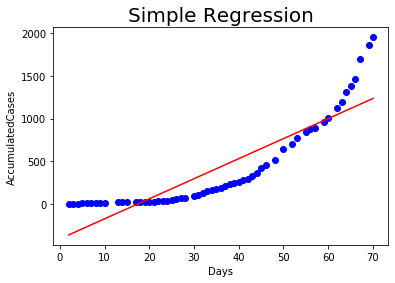

In [61]:
plt.scatter(train.Id, train.AccumulatedCases,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Days")
plt.ylabel("AccumulatedCases")
#plt.text(0.15, 1500.9, "hello")
plt.title("Simple Regression", size = 20)

#plt.plot(x,y, linewidth=3.0, label='fit')

plt.savefig('ExponentialAnalysis.png')


plt.show()

## Accuracy

In [62]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Id']])
test_y = np.asanyarray(test[['AccumulatedCases']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 188.42
Residual sum of squares (MSE): 66172.23
R2-score: 0.75


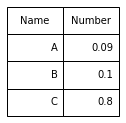

In [63]:
# wondering
dfe = pd.DataFrame({
    'Name':['A','B','C'],
    'Number':[0.09,0.1,0.8]})[['Name','Number']]

fig, ax = plt.subplots(figsize=(2,2))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=dfe.values,
         colLabels=dfe.columns,
         loc='center',
         bbox=[0,0,1,1])
plt.savefig('table.png')


# Non-Linear Regression:Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 

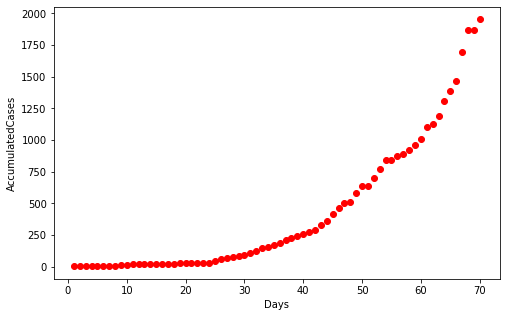

In [64]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Id"].values, df["AccumulatedCases"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Days')
plt.show()

## Model ###

In [65]:
def exponential(x,Beta1, Beta2):
     y = Beta2*np.exp(Beta1*x)
     #y = Beta1+beta2*np.exp(Beta3*x)
     return y

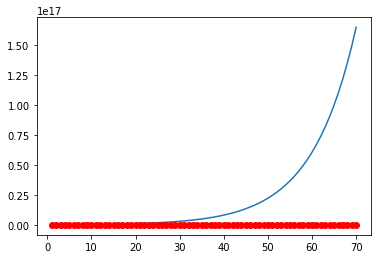

In [66]:
beta_1 = 0.10 #y = Beta2*np.exp(Beta1*x)
    
beta_2 = 1000.0
#logistic function
Y_pred = exponential(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*150000000000.)
plt.plot(x_data, y_data, 'ro')

### Normalization

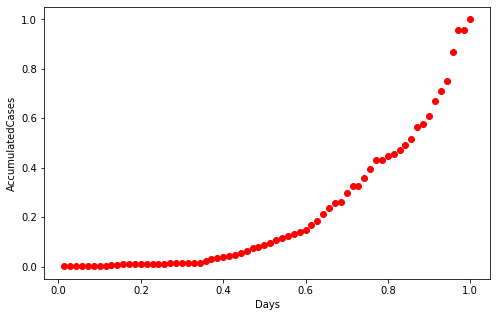

In [67]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

plt.figure(figsize=(8,5))
#x_data, y_data = (df[""].values, df["Date"].values)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Days')
plt.show()

In [68]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, xdata, ydata)
# pcov shows the range of beta
err = np.sqrt(np.diag(pcov))
#print the final parameters
print(" beta_1 = %f±%f, beta_2 = %f±%f" % (popt[0], err[0], popt[1], err[1]))

 beta_1 = 4.575518±0.082928, beta_2 = 0.010586±0.000794


No handles with labels found to put in legend.


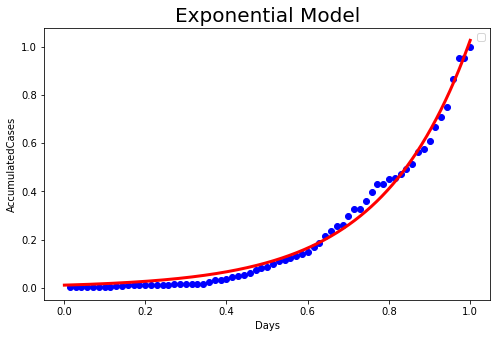

In [74]:
x = np.linspace(1,1257, 1256)
x = x/max(x)
plt.figure(figsize=(8,5))
y = exponential(x, *popt)
plt.plot(xdata, ydata, 'ro', color='blue')
plt.plot(x,y, linewidth=3.0, color='red')
plt.legend(loc='best')
plt.ylabel('AccumulatedCases')
plt.xlabel('Days')
plt.title("Exponential Model", size = 20)

plt.savefig('ExponentialAnalysis.png')


plt.show()

## Accuracy 

In [40]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(exponential, train_x, train_y)

# predict using test set
y_hat = exponential(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.99


# Non-Linear Regression: Sigmoid Regression

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

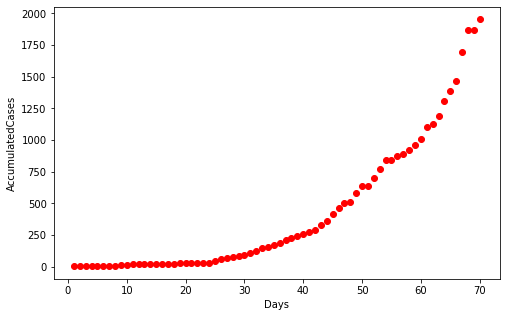

In [41]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Id"].values, df["AccumulatedCases"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Days')
plt.show()

## Model ###

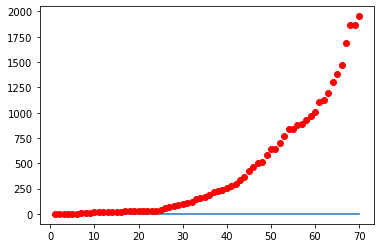

In [42]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

beta_1 = 0.10
beta_2 = 1000.0
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*150000000000.)
plt.plot(x_data, y_data, 'ro')

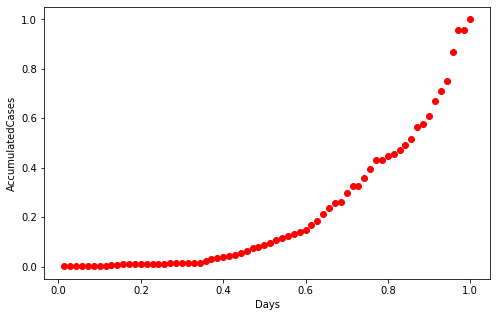

No handles with labels found to put in legend.


 beta_1 = 8.466355±0.326534, beta_2 = 0.811556±0.004537


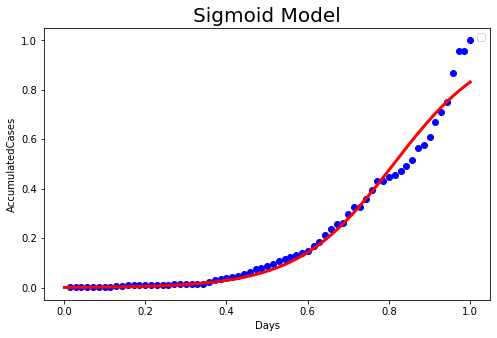

In [80]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

plt.figure(figsize=(8,5))
#x_data, y_data = (df[""].values, df[""].values)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('AccumulatedCases')
plt.xlabel('Days')
plt.show()

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# pcov shows the range of beta
err = np.sqrt(np.diag(pcov))
#print the final parameters
print(" beta_1 = %f±%f, beta_2 = %f±%f" % (popt[0], err[0], popt[1], err[1]))

x = np.linspace(1,1257, 1256)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', color='blue')
plt.plot(x,y, linewidth=3.0, color='red')
plt.legend(loc='best')
plt.ylabel('AccumulatedCases')
plt.xlabel('Days')
plt.title("Sigmoid Model", size = 20)

plt.savefig('SigmoidAnalysis.png')

plt.show()

## Accuracy 

In [44]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.96


# Polynomial Regression

In [45]:
import pylab as pl

### Dataset split

In [46]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Id']])
train_y = np.asanyarray(train[['AccumulatedCases']])

test_x = np.asanyarray(test[['Id']])
test_y = np.asanyarray(test[['AccumulatedCases']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

## Model ###

In [48]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.         -20.90976544   0.61644763]]
Intercept:  [143.43742589]


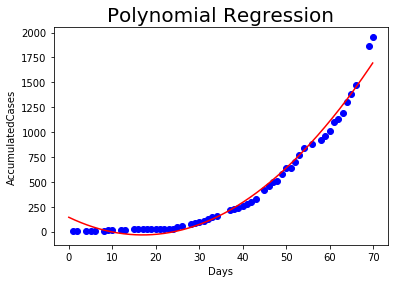

In [49]:
#plt.figure(figsize=(15, 8))

plt.scatter(train.Id, train.AccumulatedCases,  color='blue')

XX = np.arange(0.0, 70.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.title("Polynomial Regression", size = 20)

plt.plot(XX, yy, '-r')

plt.xlabel("Days")
plt.ylabel("AccumulatedCases")
plt.savefig('PolynomialAnalysis.png')

## Accuracy 

In [50]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 70.61
Residual sum of squares (MSE): 11700.58
R2-score: 0.96


# end